## **RECONOCIMIENTO DE IMAGENES A COLOR**

### **Fuente de datos**

In [2]:
import os
import zipfile

local_zip='cats_and_dogs_small.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('D:\Estadistica\DeepLearn\Imagenes')
zip_ref.close()

In [3]:
# Declaracionde rutas de los archivos

Ruta_base='D:\Estadistica\DeepLearn\Imagenes\cats_and_dogs_small'

R_Train=os.path.join(Ruta_base,'train')
R_Valid=os.path.join(Ruta_base,'validation')
R_Test=os.path.join(Ruta_base,'test')

# Carpetas con las imagenes de entrenamiento

R_Train_Cats=os.path.join(R_Train,'cats')
R_Train_Dogs=os.path.join(R_Train,'dogs')

# Carpetas con las imagenes de validacion

R_Valid_Cats=os.path.join(R_Valid,'cats')
R_Valid_Dogs=os.path.join(R_Valid,'dogs')

# Carpetas con las imagenes de prueba

R_Test_Cats=os.path.join(R_Test,'cats')
R_Test_Dogs=os.path.join(R_Test,'dogs')

In [4]:
# Verificando lectura de archivos
# Entrenamiento
print('Verificando lectura de imagenes de entrenamiento...\n')
Train_cats_fnames=os.listdir(R_Train_Cats)
print(Train_cats_fnames[:5],'\n')

Train_dogs_fnames=os.listdir(R_Train_Dogs)
print(Train_dogs_fnames[:5],'\n')

# Validacion
print('Verificando lectura de imagenes de validacion...\n')
Valid_cats_fnames=os.listdir(R_Valid_Cats)
print(Train_cats_fnames[:5],'\n')

Valid_dogs_fnames=os.listdir(R_Valid_Dogs)
print(Valid_dogs_fnames[:5],'\n')

# Prueba
print('Verificando lectura de imagenes de prueba...\n')
Test_cats_fnames=os.listdir(R_Test_Cats)
print(Test_cats_fnames[:5],'\n')

Test_dogs_fnames=os.listdir(R_Test_Dogs)
print(Test_dogs_fnames[:5],'\n')

Verificando lectura de imagenes de entrenamiento...

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg'] 

['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg'] 

Verificando lectura de imagenes de validacion...

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg'] 

['dog.1000.jpg', 'dog.1001.jpg', 'dog.1002.jpg', 'dog.1003.jpg', 'dog.1004.jpg'] 

Verificando lectura de imagenes de prueba...

['cat.1500.jpg', 'cat.1501.jpg', 'cat.1502.jpg', 'cat.1503.jpg', 'cat.1504.jpg'] 

['dog.1500.jpg', 'dog.1501.jpg', 'dog.1502.jpg', 'dog.1503.jpg', 'dog.1504.jpg'] 



In [5]:
# Verificacion de cantidad de archivos

print('Total de imagenes de entrenamiento\n')
print('Cats: ',len(os.listdir(R_Train_Cats)),'\n')
print('Dogs: ',len(os.listdir(R_Train_Dogs)),'\n\n')

print('Total de imagenes de validacion\n')
print('Cats: ',len(os.listdir(R_Valid_Cats)),'\n')
print('Dogs: ',len(os.listdir(R_Valid_Dogs)),'\n\n')

print('Total de imagenes de prueba\n')
print('Cats: ',len(os.listdir(R_Test_Cats)),'\n')
print('Dogs: ',len(os.listdir(R_Test_Dogs)),'\n\n')



Total de imagenes de entrenamiento

Cats:  1000 

Dogs:  1000 


Total de imagenes de validacion

Cats:  500 

Dogs:  500 


Total de imagenes de prueba

Cats:  500 

Dogs:  500 




### **Definición del modelo**

In [6]:
# Importando librerias

import tensorflow as tf
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten


In [7]:
# Definicion del modelo

Modelo01=Sequential()
Modelo01.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
Modelo01.add(MaxPooling2D(2,2))
Modelo01.add(Conv2D(64,(3,3),activation='relu'))
Modelo01.add(MaxPooling2D(2,2))
Modelo01.add(Conv2D(128,(3,3),activation='relu'))
Modelo01.add(MaxPooling2D(2,2))
Modelo01.add(Conv2D(128,(3,3),activation='relu'))
Modelo01.add(MaxPooling2D(2,2))
Modelo01.add(Flatten())
Modelo01.add(Dense(512,activation='relu'))
Modelo01.add(Dense(1,activation='sigmoid'))

Modelo01.summary()

c:\Users\Fernando\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Configuracion del modelo

from tensorflow.keras.optimizers import RMSprop

Modelo01.compile(optimizer=RMSprop(learning_rate =1e-4),loss='binary_crossentropy',metrics=['acc'])

### **Preprocesado**

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Se crean las instancias de los generadores necesarios para el preprocesamiento
Train_dt=ImageDataGenerator(rescale=1.0/255.)
Valid_dt=ImageDataGenerator(rescale=1.0/255.)
Test_dt=ImageDataGenerator(rescale=1.0/255.)

# Aplicacion de las instancias a las imagenes

Train_G=Train_dt.flow_from_directory(R_Train,batch_size=20,class_mode='binary',target_size=(150,150))

Valid_G=Valid_dt.flow_from_directory(R_Valid,batch_size=20,class_mode='binary',target_size=(150,150))

Test_G=Test_dt.flow_from_directory(R_Test,batch_size=20,class_mode='binary',target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### **Entrenamiento del Modelo**

In [10]:
HST=Modelo01.fit(Train_G,steps_per_epoch=10,epochs=20,
validation_data=Valid_G,validation_steps=50,verbose=2)

c:\Users\Fernando\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
10/10 - 27s - 3s/step - acc: 0.5500 - loss: 0.6907 - val_acc: 0.5000 - val_loss: 0.7024
Epoch 2/20
10/10 - 8s - 750ms/step - acc: 0.5200 - loss: 0.6945 - val_acc: 0.5000 - val_loss: 0.6903
Epoch 3/20
10/10 - 7s - 703ms/step - acc: 0.4850 - loss: 0.6969 - val_acc: 0.5140 - val_loss: 0.6883
Epoch 4/20
10/10 - 7s - 692ms/step - acc: 0.5200 - loss: 0.6906 - val_acc: 0.5030 - val_loss: 0.6913
Epoch 5/20
10/10 - 7s - 698ms/step - acc: 0.5250 - loss: 0.6882 - val_acc: 0.5000 - val_loss: 0.7040
Epoch 6/20
10/10 - 7s - 694ms/step - acc: 0.5250 - loss: 0.6891 - val_acc: 0.5380 - val_loss: 0.6833
Epoch 7/20
10/10 - 7s - 696ms/step - acc: 0.5750 - loss: 0.6842 - val_acc: 0.5400 - val_loss: 0.6869
Epoch 8/20
10/10 - 7s - 679ms/step - acc: 0.5750 - loss: 0.6841 - val_acc: 0.5620 - val_loss: 0.6832
Epoch 9/20
10/10 - 7s - 697ms/step - acc: 0.6000 - loss: 0.6746 - val_acc: 0.5640 - val_loss: 0.6817
Epoch 10/20
10/10 - 7s - 692ms/step - acc: 0.5550 - loss: 0.6808 - val_acc: 0.5250 - val_loss

### **Resultados**

<Figure size 640x480 with 0 Axes>

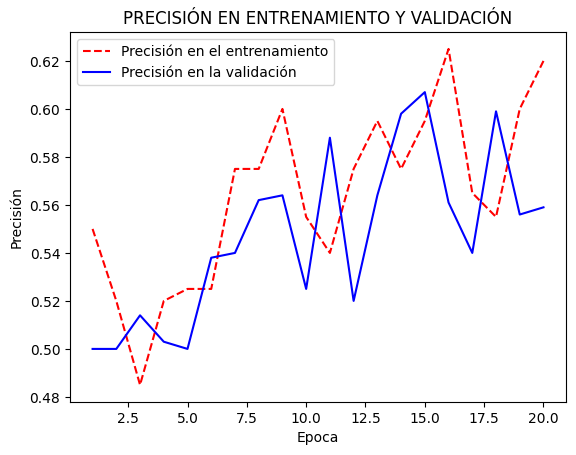

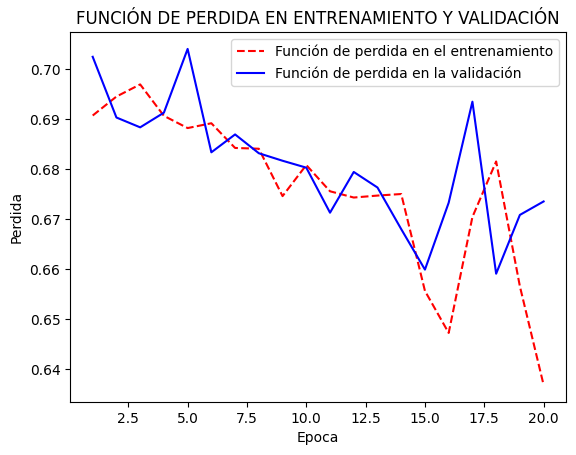

<Figure size 640x480 with 0 Axes>

In [11]:
# Visualizacion de resultados
import matplotlib.pyplot as plt

acc=HST.history['acc']
loss=HST.history['loss']
val_acc=HST.history['val_acc']
val_loss=HST.history['val_loss']

epocas=range(1,len(acc)+1,1)

plt.plot(epocas,acc,'r--',label='Precisión en el entrenamiento')
plt.plot(epocas,val_acc,'b',label='Precisión en la validación')
plt.title('PRECISIÓN EN ENTRENAMIENTO Y VALIDACIÓN')
plt.ylabel('Precisión')
plt.xlabel('Epoca')
plt.legend()
plt.figure()

plt.plot(epocas,loss,'r--',label='Función de perdida en el entrenamiento')
plt.plot(epocas,val_loss,'b',label='Función de perdida en la validación')
plt.title('FUNCIÓN DE PERDIDA EN ENTRENAMIENTO Y VALIDACIÓN')
plt.ylabel('Perdida')
plt.xlabel('Epoca')
plt.legend()
plt.figure()

In [12]:
# Resultado en el conjunto de test

test_loss, test_acc=Modelo01.evaluate(Test_G)
print('Precisión en la Prueba: ',test_acc)

50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 224ms/step - acc: 0.5424 - loss: 0.6878
Precisión en la Prueba:  0.5619999766349792


### **Predicción**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[1.]]


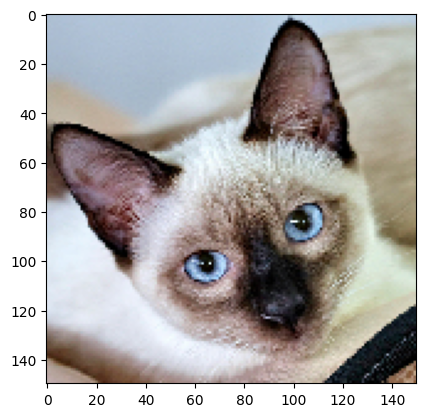

La imagen corresponde a un perro


In [36]:
import numpy as np
from tensorflow.keras.preprocessing import image

#Ruta_N='D:\Estadistica\DeepLearn'

img=image.load_img('D:\\Estadistica\\DeepLearn\\Gato.jpg',target_size=(150,150))
x=image.img_to_array(img)
imagen=np.expand_dims(x,axis=0)

clase=Modelo01.predict(imagen)
print(clase)
plt.imshow(img)
plt.show()

if clase>0: print('La imagen corresponde a un perro')
else: print('La imagen corresponde a un gato')

### **Control del sobreajuste**

A fin de evitar el efecto del sobreajuste particularmente cundo se tienen pocos datos de entrenamiento, se pueden usar algunas tecnicas que permiten mejorar el comportamiento del modelo. Dos de ellas son:

    - Data Argumentation
    - Transfer learning

#### **Data Argumentation (DA)**

Aplicable principalmente al caso de imagenes, consiste en usar transformaciones sobre las imagenes de entrenamiento de tal manera que con los misma informacion se pueda ampliar generado nuevos elementos para mejorar el aprendizaje de la red.

In [39]:
# Ajuste de los datos de entrenamiento
Train_dt2=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

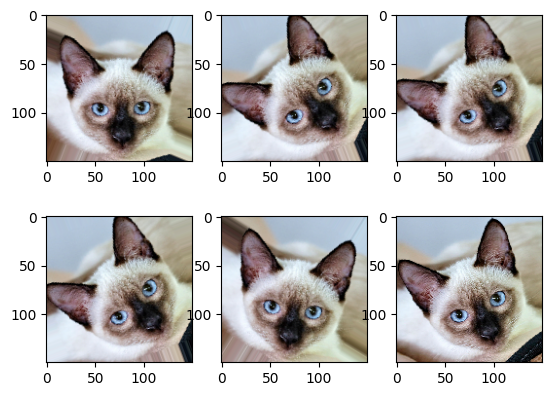

In [38]:
# Aplicacion de rotacion sobre la imagen

datagen=ImageDataGenerator(rotation_range=45)

x=image.img_to_array(img)
imagen=np.expand_dims(x,axis=0)
it=datagen.flow(imagen,batch_size=1)

for i in range(6):
    plt.subplot(230+1+i)
    batch=next(it)
    image2=batch[0].astype('uint8')
    plt.imshow(image2)
plt.show()


In [ ]:
# Solo se requiere afectar los datos de entrenamiento
Train_G2=Train_dt2.flow_from_directory(R_Train,batch_size=20,class_mode='binary',target_size=(150,150))


Found 2000 images belonging to 2 classes.
2000


##### **Entrenamiento con DA**

In [50]:
Tam_lote=100

Pasos_Epoca=Train_G2.samples//Tam_lote
Pasos_Valid=Valid_G.samples//Tam_lote

HST2=Modelo01.fit(Train_G2,
                  steps_per_epoch=Pasos_Epoca,
                  epochs=60,
                  validation_data=Valid_G,
                  validation_steps=Pasos_Valid,
                  verbose=2)

Epoch 1/60
20/20 - 8s - 395ms/step - acc: 0.6750 - loss: 0.6078 - val_acc: 0.6200 - val_loss: 0.6193
Epoch 2/60
20/20 - 7s - 371ms/step - acc: 0.6725 - loss: 0.6184 - val_acc: 0.6650 - val_loss: 0.5922
Epoch 3/60
20/20 - 7s - 373ms/step - acc: 0.6400 - loss: 0.6250 - val_acc: 0.6150 - val_loss: 0.6243
Epoch 4/60
20/20 - 7s - 372ms/step - acc: 0.6650 - loss: 0.6070 - val_acc: 0.6500 - val_loss: 0.6125
Epoch 5/60
20/20 - 8s - 387ms/step - acc: 0.6350 - loss: 0.6300 - val_acc: 0.6450 - val_loss: 0.6223
Epoch 6/60
20/20 - 8s - 381ms/step - acc: 0.6375 - loss: 0.6101 - val_acc: 0.6300 - val_loss: 0.6242
Epoch 7/60
20/20 - 7s - 374ms/step - acc: 0.6875 - loss: 0.5946 - val_acc: 0.6500 - val_loss: 0.6340
Epoch 8/60
20/20 - 7s - 375ms/step - acc: 0.6925 - loss: 0.5921 - val_acc: 0.7150 - val_loss: 0.5715
Epoch 9/60
20/20 - 8s - 386ms/step - acc: 0.6750 - loss: 0.6091 - val_acc: 0.7050 - val_loss: 0.5469
Epoch 10/60
20/20 - 7s - 369ms/step - acc: 0.7025 - loss: 0.5780 - val_acc: 0.6650 - val_lo

In [64]:
def Gf_metricas(HST, titulo_acc='PRECISIÓN', titulo_loss='FUNCIÓN DE PÉRDIDA'):
    """
    Crea dos gráficas para visualizar las métricas de entrenamiento y validación.
    
    Parámetros:
    HST (History): Objeto de historial de entrenamiento de Keras
    titulo_acc (str): Título para la gráfica de precisión (opcional)
    titulo_loss (str): Título para la gráfica de pérdida (opcional)
    """
    # Extraer datos del historial
    acc = HST.history['acc']
    loss = HST.history['loss']
    val_acc = HST.history['val_acc']
    val_loss = HST.history['val_loss']
    epocas = range(1, len(acc)+1, 1)

    # Configurar estilo de las gráficas
    plt.figure(figsize=(10, 4))

    # Gráfica de precisión
    plt.subplot(1, 2, 1)
    plt.plot(epocas, acc, 'r--', label='Entrenamiento')
    plt.plot(epocas, val_acc, 'b', label='Validación')
    plt.title(titulo_acc)
    plt.ylabel('Precisión')
    plt.xlabel('Época')
    plt.legend()

    # Gráfica de pérdida
    plt.subplot(1, 2, 2)
    plt.plot(epocas, loss, 'r--', label='Entrenamiento')
    plt.plot(epocas, val_loss, 'b', label='Validación')
    plt.title(titulo_loss)
    plt.ylabel('Pérdida')
    plt.xlabel('Época')
    plt.legend()

    plt.tight_layout()
    plt.show()



In [ ]:
# Graficando las metricas
Gf_metricas(HST2)

In [58]:
# Prediccion del modelo con los datos de test

test_lost, test_acc=Modelo01.evaluate(Test_G)
print("Precision del modelo con el conjunto de prueba: ",test_acc)
print("Perdida del modelo con el conjunto de prueba: ",test_loss)

50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 226ms/step - acc: 0.7137 - loss: 0.5614
Precision del modelo con el conjunto de prueba:  0.7039999961853027
Perdida del modelo con el conjunto de prueba:  0.6836345195770264


#### **Transfer Learning**

Esto consiste en hacer uso de modelos pre-entrenados que en el caso de redes convolucionales es posible separar las capas que identifican las partes de las imagenes (principalmente las capas convolucionales y maxpooling) y las capas finales que logran asignar la categoria final. Esto facilita emplear modelos previamente entrenados con suficiente información y adaptarlos a casos mas especificos sin la necesidad de disponer que de grandes cantidades de datos para la fase de entrenamiento.

##### **Modelo VGG16**

In [53]:
from tensorflow.keras.applications import VGG16

# Extraccion de la parte convolucional

Pre_trained_model=VGG16(input_shape=(150,150,3),include_top=False,weights='imagenet')
Pre_trained_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# Modelo a ajustar
for layer in Pre_trained_model.layers:
    layer.trainable=False

Modelo02=Sequential()
Modelo02.add(Pre_trained_model)
Modelo02.add(Flatten())
Modelo02.add(Dense(256,activation='relu'))
Modelo02.add(Dense(1,activation='sigmoid'))

Modelo02.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [60]:
# Configuracion del modelo
Modelo02.compile(optimizer=RMSprop(learning_rate =1e-4),loss='binary_crossentropy',metrics=['acc'])

In [61]:
# Entrenamiento

HST3=Modelo02.fit(Train_G2,
                  steps_per_epoch=Pasos_Epoca,
                  epochs=60,
                  validation_data=Valid_G,
                  validation_steps=Pasos_Valid,
                  verbose=2)

Epoch 1/60
20/20 - 44s - 2s/step - acc: 0.6050 - loss: 0.7128 - val_acc: 0.7650 - val_loss: 0.5006
Epoch 2/60
20/20 - 40s - 2s/step - acc: 0.7325 - loss: 0.5264 - val_acc: 0.8050 - val_loss: 0.4158
Epoch 3/60
20/20 - 40s - 2s/step - acc: 0.7300 - loss: 0.5105 - val_acc: 0.8850 - val_loss: 0.3406
Epoch 4/60
20/20 - 41s - 2s/step - acc: 0.7375 - loss: 0.4981 - val_acc: 0.8850 - val_loss: 0.3228
Epoch 5/60
20/20 - 40s - 2s/step - acc: 0.8125 - loss: 0.4088 - val_acc: 0.8700 - val_loss: 0.3114
Epoch 6/60
20/20 - 40s - 2s/step - acc: 0.8250 - loss: 0.4130 - val_acc: 0.8600 - val_loss: 0.3219
Epoch 7/60
20/20 - 41s - 2s/step - acc: 0.8000 - loss: 0.4161 - val_acc: 0.8300 - val_loss: 0.3760
Epoch 8/60
20/20 - 40s - 2s/step - acc: 0.7975 - loss: 0.4478 - val_acc: 0.8650 - val_loss: 0.2688
Epoch 9/60
20/20 - 40s - 2s/step - acc: 0.8250 - loss: 0.4140 - val_acc: 0.8350 - val_loss: 0.3343
Epoch 10/60
20/20 - 40s - 2s/step - acc: 0.8100 - loss: 0.3982 - val_acc: 0.8850 - val_loss: 0.2752
Epoch 11/

In [62]:
# Prediccion del modelo con los datos de test

test_lost, test_acc=Modelo01.evaluate(Test_G)
print("Precision del modelo con el conjunto de prueba: ",test_acc)
print("Perdida del modelo con el conjunto de prueba: ",test_loss)

50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - acc: 0.6958 - loss: 0.5739
Precision del modelo con el conjunto de prueba:  0.7039999961853027
Perdida del modelo con el conjunto de prueba:  0.6836345195770264


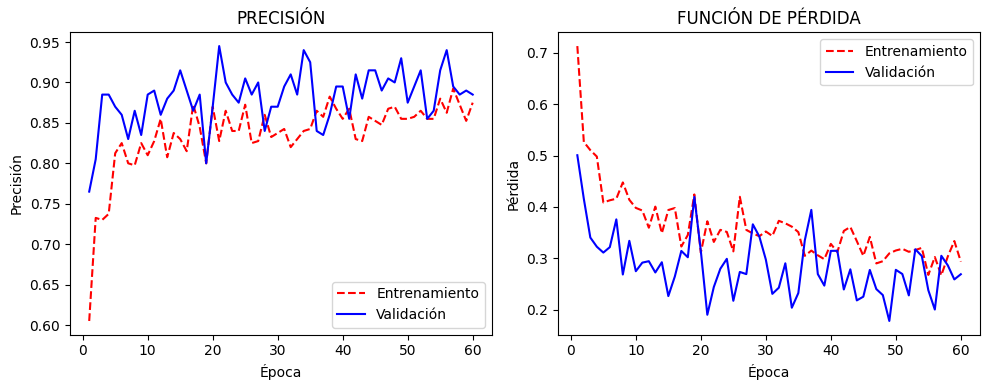

In [65]:
# Graficando las metricas
Gf_metricas(HST3)